采用SVM分类器处理不均衡样本

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import warnings
warnings.filterwarnings("ignore")

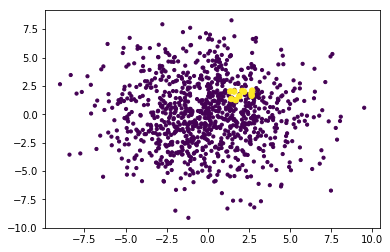

In [4]:
# 1. 生成样本
np.random.seed(0)
num_c1 = 990    # 丰富类样本数
num_c2 = 10     # 稀有类样本数
N = num_c1 + num_c2

dt_c1 = 3 * np.random.randn(num_c1, 2)     # 生成丰富类二维随机样本
dt_c2 = 0.5 * np.random.randn(num_c2, 2) + np.array([2, 2])    # 生成丰富类二维随机样本
dt = np.vstack((dt_c1, dt_c2))

# 样本类别，同时可以用来表示颜色
y = np.ones(N)
y[:num_c1] = -1

# 大小
s = np.ones(N) * 10
s[num_c1:] = 30

# 样本散点图
plt.scatter(dt[:,0], dt[:, 1], c=y, s=s)
plt.show()

对于第1个分类器：
正确率：	 0.99
精准率：	 0.0
召回率：	 0.0
F1-Score：	 0.0
对于第2个分类器：
正确率：	 0.747
精准率：	 0.03802281368821293
召回率：	 1.0
F1-Score：	 0.07326007326007325
对于第3个分类器：
正确率：	 0.99
精准率：	 0.0
召回率：	 0.0
F1-Score：	 0.0
对于第4个分类器：
正确率：	 0.973
精准率：	 0.2702702702702703
召回率：	 1.0
F1-Score：	 0.4255319148936171


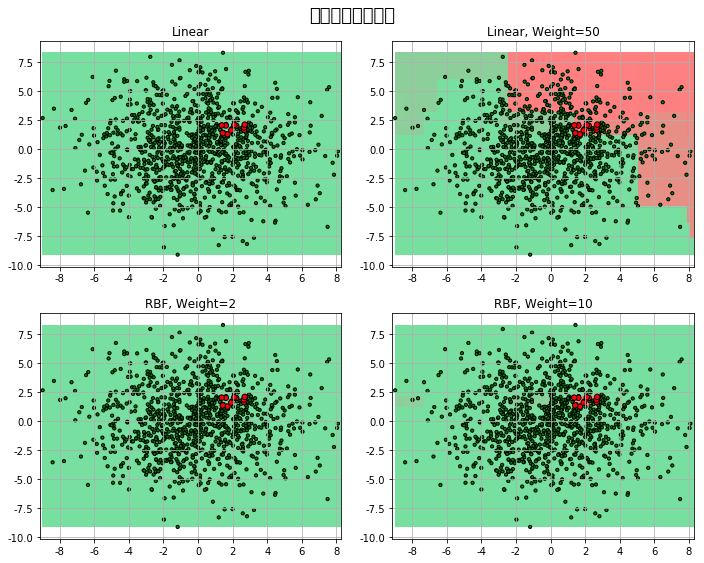

In [8]:
# 2. 用SVC进行分类
clfs = [SVC(C=1.0, kernel='linear'), 
        SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
        SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
        SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]

# 画图配置
cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8), facecolor='w')
titles = ['Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10']

# 分类器学习并画图
for i, clf in enumerate(clfs):
    clf.fit(dt, y)
    y_pred = clf.predict(dt)
    
    print("对于第{}个分类器：".format(i+1))
    print("正确率：\t", accuracy_score(y, y_pred))
    print("精准率：\t", precision_score(y, y_pred))
    print("召回率：\t", recall_score(y, y_pred))
    print("F1-Score：\t", f1_score(y, y_pred))
    
    plt.subplot(2, 2, i+1)
    x_mesh, y_mesh = np.meshgrid(dt[:,0], dt[:,1])
    grid_points = np.c_[x_mesh.ravel(), y_mesh.ravel()]
    grid_pred = clf.predict(grid_points)
    grid_pred = grid_pred.reshape(x_mesh.shape)
    plt.pcolormesh(x_mesh, y_mesh, grid_pred, cmap=cm_light, alpha=0.8)
    
    plt.scatter(dt[:,0], dt[:, 1], c=y.ravel(), edgecolors='k', s=s, cmap=cm_dark)
    plt.xlim(x_mesh.min(), x_mesh.max())
    plt.xlim(y_mesh.min(), y_mesh.max())
    plt.title(titles[i])
    plt.grid()
plt.suptitle(u'不平衡数据的处理', fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()